# Rain Prediction Project on Australian Weather Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
dataset = pd.read_csv('weatherAUS/weatherAUS.csv')

In [3]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

since data from various columns is missing, we need solve that problem


In [8]:
dataset.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [10]:
no = dataset.isnull().sum()
percent = no / len(dataset)*100

missing_values = pd.DataFrame({"Total No.": no, "Percentage":percent}).sort_values(ascending=False, by='Percentage')
missing_values

,Total No.,Percentage
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


In [11]:
# returning how many duplicate rows are there
dataset.duplicated().sum()

0

# Data Preprocessing 

In [15]:
# getting the columns where the null values' avg % below 5

cols = [var for var in dataset.columns if dataset[var].isnull().mean()*100<5 
        and dataset[var].isnull().mean()*100 >0]

In [13]:
print("Shape of dataframe before dropping missing values: ", dataset.shape)

Shape of dataframe before dropping missing values:  (145460, 23)


In [14]:
cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [16]:
dataset = dataset.dropna(subset=['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow'])

In [17]:
# getting the columns where the null values' avg % below 5

cols2 = [var for var in dataset.columns if dataset[var].isnull().mean()*100> 0 
        and dataset[var].isnull().mean()*100 <5 ]
cols2

['WindGustDir', 'WindGustSpeed']

In [18]:
print("Shape of dataframe after dropping missing values: ", dataset.shape)

Shape of dataframe after dropping missing values:  (134590, 23)


In [25]:
no = dataset.isnull().sum()
percent = no / len(dataset)*100

missing_values = pd.DataFrame({"Total No.": no, "Percentage":percent}).sort_values(ascending=False, by='Percentage')
missing_values

,Total No.,Percentage
Sunshine,59694,46.427016
Evaporation,53996,41.995396
Cloud3pm,51137,39.771808
Cloud9am,49753,38.695402
Pressure9am,9537,7.417403
Pressure3pm,9482,7.374627
WindDir9am,6786,5.277812
Date,0,0.000000
Humidity9am,0,0.000000
RainToday,0,0.000000


In [23]:
dataset.dropna(subset=['WindGustDir', 'WindGustSpeed'], inplace=True)

In [24]:
print("Shape of dataframe After dropping missing values: ",dataset.shape)

Shape of dataframe After dropping missing values:  (128576, 23)


Targetting Columns having % of Null values greater than 5 and Lesser than 10

In [26]:
cols3 = [var for var in dataset.columns if dataset[var].isnull().mean()*100> 5 
        and dataset[var].isnull().mean()*100 <10 ]
cols3

['WindDir9am', 'Pressure9am', 'Pressure3pm']

In [27]:
num_cols = ['WindGustSpeed', 'Pressure9am', 'Pressure3pm']
category_cols = ['WindDir9am']

We have to decided whether to use mean, mode or median for Imputation now, we will use BoxPlot for it

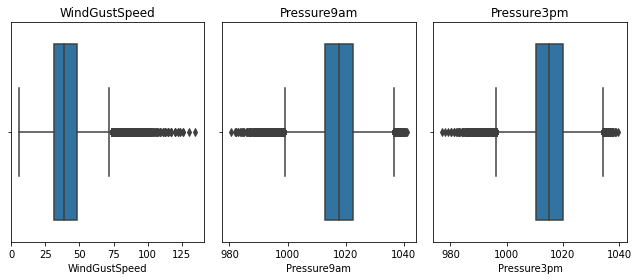

In [28]:
plt.figure(figsize=(9,4))
for i , cols in enumerate(num_cols):
    plt.subplot(1,3, i+1)
    sns.boxplot(data=dataset, x=cols)
    plt.title(f'{cols}')
plt.tight_layout()
plt.show()

Result:

> Data is Skewed, There are many datapoints that act as outliers
> Outliers data pts will have a significant impact on the mean and hence, in such cases it is NOT recommended to use the Mean for replacing the missing values
> using mean value for replacing missing values may not create a great model
> Hence we use Median for Imputation, as the Median is less Sensitive to outliers than the Mean

In [29]:
dataset['WindGustSpeed'] = dataset['WindGustSpeed'].fillna(dataset['WindGustSpeed'].median())

dataset['Pressure9am'] = dataset['Pressure9am'].fillna(dataset['Pressure9am'].median())

dataset['Pressure3pm'] = dataset['Pressure3pm'].fillna(dataset['Pressure3pm'].median())

In [35]:

dataset['WindDir9am'] = dataset['WindDir9am'].fillna(dataset['WindDir9am'].mode()[0])

In [36]:
no = dataset.isnull().sum()
percent = no / len(dataset)*100

missing_values = pd.DataFrame({"Total No.": no, "Percentage":percent}).sort_values(ascending=False, by='Percentage')
missing_values

,Total No.,Percentage
Sunshine,59694,46.427016
Evaporation,53996,41.995396
Cloud3pm,51137,39.771808
Cloud9am,49753,38.695402
Date,0,0.000000
Humidity9am,0,0.000000
RainToday,0,0.000000
Temp3pm,0,0.000000
Temp9am,0,0.000000
Pressure3pm,0,0.000000


Now we will impute the Columns Evaporation, Sunshine, Cloud9am, Cloud3pm

In [37]:
dataset['Cloud9am_imputed'] = dataset['Cloud9am']

In [38]:
dataset['Cloud9am_imputed'][dataset['Cloud9am_imputed'].isnull()] = dataset['Cloud9am'].dropna().sample(dataset['Cloud9am'].isnull().sum(), replace=True).values

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20632\1971846146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cloud9am_imputed'][dataset['Cloud9am_imputed'].isnull()] = dataset['Cloud9am'].dropna().sample(dataset['Cloud9am'].isnull().sum(), replace=True).values


In [39]:
dataset['Evaporation_imputed'] = dataset['Evaporation']

In [40]:
dataset['Evaporation_imputed'][dataset['Evaporation_imputed'].isnull()] = dataset['Evaporation'].dropna().sample(dataset['Evaporation'].isnull().sum(), replace=True).values

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20632\317538280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Evaporation_imputed'][dataset['Evaporation_imputed'].isnull()] = dataset['Evaporation'].dropna().sample(dataset['Evaporation'].isnull().sum(), replace=True).values


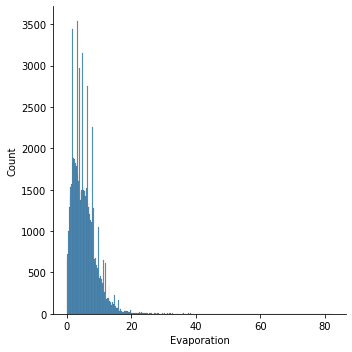

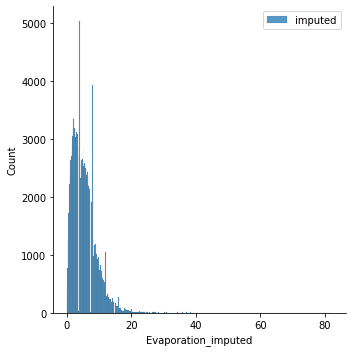

In [43]:
sns.displot(dataset['Evaporation'], label='original' )
sns.displot(dataset['Evaporation_imputed'], label='imputed')

plt.legend()
plt.show()

In [44]:
dataset[['Evaporation','Evaporation_imputed']].var()

Evaporation            17.613197
Evaporation_imputed    17.492213
dtype: float64

In [45]:
dataset['Sunshine_imputed'] = dataset['Sunshine']

In [58]:
dataset['Sunshine_imputed'][dataset['Sunshine_imputed'].isnull()] = dataset['Sunshine'].dropna().sample(dataset['Sunshine'].isnull().sum(), replace = True).values

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20632\2970392735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sunshine_imputed'][dataset['Sunshine_imputed'].isnull()] = dataset['Sunshine'].dropna().sample(dataset['Sunshine'].isnull().sum(), replace = True).values


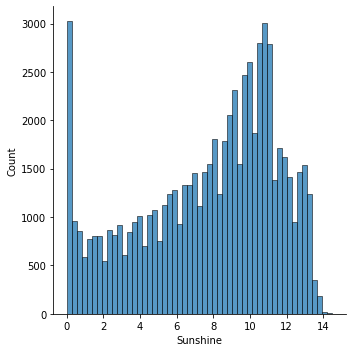

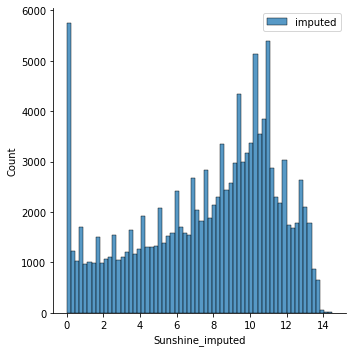

In [60]:
sns.displot(dataset['Sunshine'], label='original')
sns.displot(dataset['Sunshine_imputed'], label='imputed')

plt.legend()
plt.show()

In [53]:
dataset['Cloud3pm_imputed'] = dataset['Cloud3pm']

In [54]:
dataset['Cloud3pm_imputed'][dataset['Cloud3pm_imputed'].isnull()] = dataset['Cloud3pm'].dropna().sample(dataset['Cloud3pm'].isnull().sum(), replace = True).values

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20632\100487546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cloud3pm_imputed'][dataset['Cloud3pm_imputed'].isnull()] = dataset['Cloud3pm'].dropna().sample(dataset['Cloud3pm'].isnull().sum(), replace = True).values


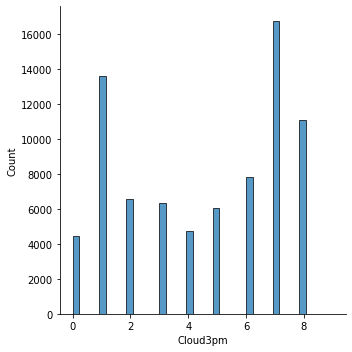

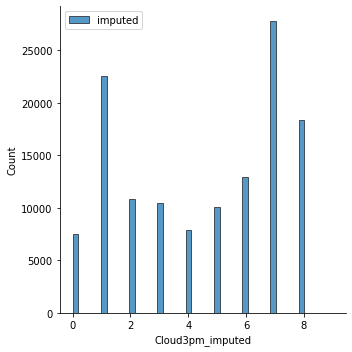

In [55]:
sns.displot(dataset['Cloud3pm'], label="original")
sns.displot(dataset['Cloud3pm_imputed'], label="imputed")

plt.legend()
plt.show()

In [56]:
dataset[['Cloud3pm', 'Cloud3pm_imputed']].var()

Cloud3pm            7.399857
Cloud3pm_imputed    7.415412
dtype: float64

In [61]:
no = dataset.isnull().sum()
percent = no / len(dataset)*100

missing_values = pd.DataFrame({"Total No.": no, "Percentage":percent}).sort_values(ascending=False, by='Percentage')
missing_values

,Total No.,Percentage
Sunshine,59694,46.427016
Evaporation,53996,41.995396
Cloud3pm,51137,39.771808
Cloud9am,49753,38.695402
Date,0,0.000000
Pressure9am,0,0.000000
Sunshine_imputed,0,0.000000
Evaporation_imputed,0,0.000000
Cloud9am_imputed,0,0.000000
RainTomorrow,0,0.000000


In [62]:
dataset=dataset.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)

In [64]:
dataset.isnull().sum().sum()

0

In [65]:
dataset.isnull().sum().sum()

0

In [66]:
dataset['RainTomorrow'] = dataset['RainTomorrow'].replace({'No':0, 'Yes':1})

In [69]:
cat_cols= dataset.select_dtypes(include="object").columns.to_list()
cat_cols

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [70]:
cat_cols.remove('Date')

In [71]:
cat_cols.remove("RainToday")

In [72]:
# let's do One Hot Encoding of categorical variable
# get k-1 dummy variables after One Hot Encoding


dataset = pd.get_dummies(dataset, columns=cat_cols, drop_first=True)

In [87]:
dataset.drop('Date', axis=1, inplace=True)

KeyError: "['Date'] not found in axis"

In [88]:
pd.set_option('display.max_columns', None)

dataset.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Cloud9am_imputed,Evaporation_imputed,Sunshine_imputed,Cloud3pm_imputed,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0,8.0,1.4,10.3,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0,6.0,5.4,10.7,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0,7.0,8.6,8.6,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,0,1.0,4.0,11.3,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0,7.0,6.2,9.1,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [89]:
dataset['RainToday'] = dataset['RainToday'].replace({'No':0, 'Yes':1})

In [90]:
dataset.shape

(128576, 109)

# Model Training and Testing

In [91]:
X = dataset.drop(["RainTomorrow"], axis=1)
y = dataset["RainTomorrow"]

In [92]:
from sklearn.preprocessing import RobustScaler

scalar = RobustScaler()

X_scaled = scalar.fit_transform(X)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [94]:
from sklearn.linear_model import LogisticRegression


In [95]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [96]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [97]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8528


In [99]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))


Training set score: 0.8550
Test set score: 0.8528


We can see that the training-set accuracy score is 0.8550 while the test-set accuracy to be 0.8528. These two values are quite comparable. So, there is no case of overfitting and underfitting.